<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/urphandwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten digits classification using neural network**
## In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves.
pip install tensorflow-datasets: The stable version, released every few months.
pip install tfds-nightly: Released every day, contains the last versions of the datasets.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

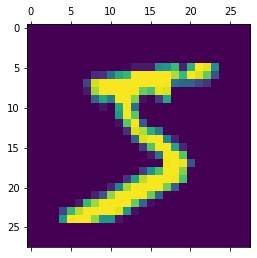

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

First five symbols of y_train


In [28]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

28*28 into single dimensional array ie 784 elements


In [29]:
X_train = X_train / 255
X_test = X_test / 255

In [30]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [31]:
X_train_flattened.shape

(60000, 784)

In [32]:
X_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# **a number of epochs means how many times you go through your training set.**
input layer 784 elements and output layer 10 elements
sequential means stack of neural network
Dense means every neuron connected from first layer to second layer
A weighted sum of inputs is passed through an activation function and this output serves as an input to the next layer. When the activation function for a neuron is a sigmoid function it is a guarantee that the output of this unit will always be between 0 and 1.
An optimizer is one of the two arguments required for compiling a Keras model.
The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.Good with sparse data: the adaptive learning rate is perfect for this type of datasets.
While training the deep learning model, we need to modify each epoch's weights and minimize the loss function. An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.
A metric is a function that is used to judge the performance of your model.
Use this crossentropy loss function when there are two or more label classes.
The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.


In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1883 - accuracy: 0.5657
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9774 - accuracy: 0.7090
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7906 - accuracy: 0.7390
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6266 - accuracy: 0.7596
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4837 - accuracy: 0.7750


In [34]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4042 - accuracy: 0.8022


[1.4041861295700073, 0.8022000193595886]

In [35]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([0.31558824, 0.39432618, 0.35154653, 0.41927415, 0.4815396 ,
       0.37745255, 0.28457606, 0.81099814, 0.37166184, 0.5847867 ],
      dtype=float32)

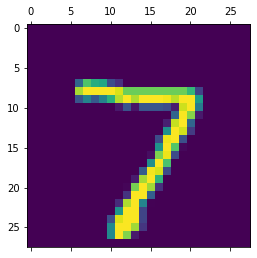

In [50]:
plt.matshow(X_test[0])

In [51]:
np.argmax(y_predicted[0])

7

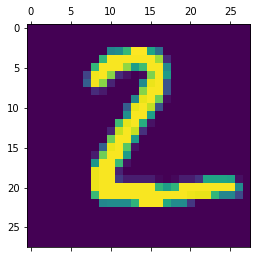

In [47]:
plt.matshow(X_test[1])

In [48]:
np.argmax(y_predicted[1])

2

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [39]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 928,    1,    5,   12,    0,    2,   26,    1,    5,    0],
       [   0, 1108,    8,    4,    0,    1,    4,    0,   10,    0],
       [  19,   80,  781,   43,   20,    0,   30,   22,   36,    1],
       [   5,   42,   27,  873,    1,    2,    5,   27,   20,    8],
       [   2,   44,    3,    0,  796,    0,   28,   10,    4,   95],
       [  37,  108,    3,  222,   36,  362,   26,   45,   25,   28],
       [  27,   47,    7,    0,   16,   10,  850,    0,    1,    0],
       [   2,   65,   12,    2,   11,    0,    2,  906,    7,   21],
       [  22,   87,   10,  105,   18,    2,   16,   26,  663,   25],
       [  23,   39,    5,   13,   73,    0,    1,   93,    7,  755]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

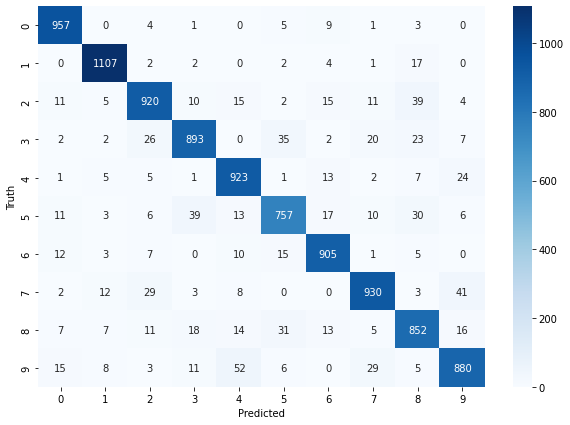

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

IN confusion matrix anything is not on diagonals is an error . There are few errors.first element of diagonal show that 928 times the lable is zero and predicted is also zero.

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1879 - accuracy: 0.7124
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4996 - accuracy: 0.8704
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3860 - accuracy: 0.8947
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3421 - accuracy: 0.9038
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.9101


At above step I have added hidden layer to improve the accuracy of model. first layer we should give 100 neurons for hidden layer as an experiment .It should be less than neurons of input layer. last layer their is no need of input neurons.Rectified Linear Unit activation function.

In [56]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2967 - accuracy: 0.9140


[0.2966969609260559, 0.9139999747276306]

Text(69.0, 0.5, 'Truth')

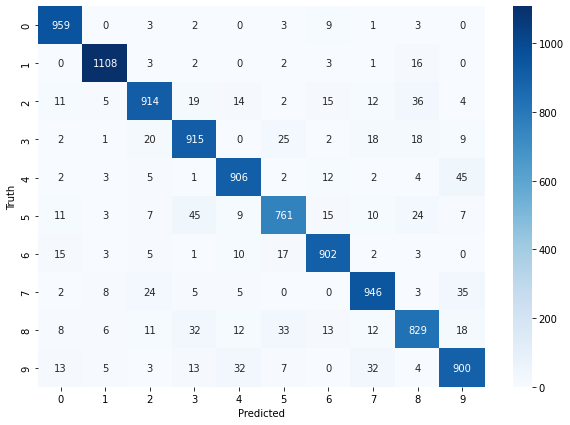

In [58]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2295 - accuracy: 0.7053
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5124 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3960 - accuracy: 0.8918
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3496 - accuracy: 0.9020
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3241 - accuracy: 0.9073
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.9115
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.9155
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2823 - accuracy: 0.9186
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.9207
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.263

In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.9254


[0.25341325998306274, 0.9254000186920166]